In [2]:
from OpenSSL import crypto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import time

In [3]:
def normalise_counter(ctr):
    total = sum(ctr.values())
    for key in ctr.keys():
        ctr[key] /=total
    return ctr

In [7]:
phish_df = pd.read_csv('final_certificate_datasets/phish_dataset.csv')
benign_df = pd.read_csv('final_certificate_datasets/benign_certs.csv')
benign_df.drop_duplicates(subset=['CN'],inplace=True)
phish_df2 = pd.read_csv('final_certificate_datasets/phish_harsh_subset.csv')
phish_df3 =  pd.read_csv('final_certificate_datasets/phish_dataset_urls.csv')
benign_df2 = pd.read_csv('final_certificate_datasets/benign_unpopular.csv')
benign_df2.drop_duplicates(subset=['CN'],inplace=True)
benign_df2['verCode'] = benign_df2['verCode'].astype(str)
#benign_df3 = benign_df[:500]
all_dfs = [phish_df,phish_df2,phish_df3,benign_df,benign_df2]
labels = ['phish','phish subset','phish all urls','benign','benign unpopular']

In [17]:

def experiment(df,valid_only=True):

    if valid_only:
        df = df.loc[df['verCode'].astype(str)=='0']
        
    print(Counter(df['verCode']))
    return Counter(df['verCode'])
    #print(normalise_counter(Counter(df['verCode'])))

In [28]:
all_keys = []
all_ctrs = []
for z,df in enumerate(all_dfs):
    ctr = experiment(df,False)
    all_keys+=ctr.keys()
    all_ctrs.append(ctr)

Counter({'0': 4525, '10': 249, '18': 127, '21': 55, '19': 2, 'None': 1})
Counter({'0': 1519, '10': 61, '18': 60, '21': 21, 'None': 1})
Counter({'0': 12751, '10': 541, '18': 521, '21': 155, 'None': 5, '19': 4})
Counter({'0': 27022, '10': 491, '21': 440, '18': 98, '19': 11, '20': 4, 'None': 2})
Counter({'0': 9417, '10': 377, '21': 182, '18': 104, '19': 5, '20': 1})


In [29]:
all_keys = set(all_keys)
all_keys

{'0', '10', '18', '19', '20', '21', 'None'}

In [41]:
new_df = pd.DataFrame()
new_df['labels'] = labels
for code in all_keys:
    results = []
    for i,ctr in enumerate(all_ctrs):
        if code in ctr.keys():
            results.append(ctr[code]/len(all_dfs[i]))
        else:
            results.append(0)
    print(results)
    new_df[code] = results

[0, 0, 0, 0.00014251104460595695, 9.9147332936744e-05]
[0.00020165355918531962, 0.0006016847172081829, 0.00035773055734420833, 7.125552230297848e-05, 0]
[0.00040330711837063924, 0, 0.00028618444587536667, 0.00039190537266638165, 0.00049573666468372]
[0.9124823553135712, 0.9139590854392299, 0.9122844673392001, 0.9627333618355423, 0.9336704342653183]
[0.025610002016535592, 0.036101083032490974, 0.03727552407526651, 0.0034915205928459456, 0.010311322625421376]
[0.05021173623714459, 0.036702767749699154, 0.038706446304643344, 0.017493230725381215, 0.03737854451715249]
[0.01109094575519258, 0.01263537906137184, 0.011089647277670459, 0.015676214906655266, 0.01804481459448741]


In [42]:
new_df

,labels,20,None,19,0,18,10,21
0,phish,0.000000,0.000202,0.000403,0.912482,0.025610,0.050212,0.011091
1,phish subset,0.000000,0.000602,0.000000,0.913959,0.036101,0.036703,0.012635
2,phish all urls,0.000000,0.000358,0.000286,0.912284,0.037276,0.038706,0.011090
3,benign,0.000143,0.000071,0.000392,0.962733,0.003492,0.017493,0.015676
4,benign unpopular,0.000099,0.000000,0.000496,0.933670,0.010311,0.037379,0.018045


In [43]:
df2 = pd.DataFrame()
df2['Dataset']=labels
df2['Valid (0)'] = new_df['0']
df2['Expired (10)'] = new_df['10']
df2['Self-signed (18 & 19)'] = [new_df['18'][i] + new_df['19'][i] for i in range(len(new_df))]
df2['Verify Error (21)'] = new_df['21']
df2['Other'] = [new_df['None'][i] + new_df['20'][i] for i in range(len(new_df))]
df2.set_index('Dataset',inplace=True)
df2


,Valid (0),Expired (10),Self-signed (18 & 19),Verify Error (21),Other
Dataset,,,,,
phish,0.912482,0.050212,0.026013,0.011091,0.000202
phish subset,0.913959,0.036703,0.036101,0.012635,0.000602
phish all urls,0.912284,0.038706,0.037562,0.011090,0.000358
benign,0.962733,0.017493,0.003883,0.015676,0.000214
benign unpopular,0.933670,0.037379,0.010807,0.018045,0.000099


<AxesSubplot:ylabel='Dataset'>

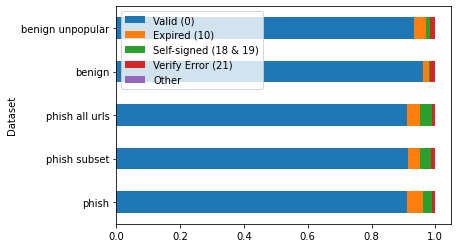

In [44]:
df2.plot(y=['Valid (0)','Expired (10)','Self-signed (18 & 19)','Verify Error (21)','Other'],kind='barh',stacked=True)

### phish:

In [13]:
Counter(phish_df['verCode'])

Counter({'0': 4525, '10': 249, '18': 127, '21': 55, 'None': 1, '19': 2})

In [12]:
ctr = Counter(phish_df['verCode'])
ctr = normalise_counter(ctr)
ctr

Counter({'0': 0.9124823553135712,
         '10': 0.05021173623714459,
         '18': 0.025610002016535592,
         '21': 0.01109094575519258,
         'None': 0.00020165355918531962,
         '19': 0.00040330711837063924})

### benign:

In [16]:
Counter(benign_df['verCode'])

Counter({'0': 39691,
         '21': 483,
         '10': 581,
         '18': 215,
         'None': 2,
         '20': 4,
         '19': 13})

In [17]:
ctr = Counter(benign_df['verCode'])
ctr = normalise_counter(ctr)
ctr

Counter({'0': 0.9683329673814925,
         '21': 0.011783649271755837,
         '10': 0.014174534631242528,
         '18': 0.005245309717241211,
         'None': 4.879357876503452e-05,
         '20': 9.758715753006904e-05,
         '19': 0.0003171582619727244})

In [18]:
#top benign
codes = benign_df['verCode']
b200 = codes[:200]
b5000 = codes[100:5000]

In [19]:
ctr = Counter(b200)
ctr = normalise_counter(ctr)
ctr

Counter({'0': 0.995, '21': 0.005})

In [23]:
Counter(b200)

Counter({'0': 199, '21': 1})

In [20]:
ctr = Counter(b5000)
ctr = normalise_counter(ctr)
ctr

Counter({'0': 0.9861224489795918,
         '21': 0.00816326530612245,
         '10': 0.004081632653061225,
         '18': 0.0014285714285714286,
         'None': 0.00020408163265306123})

In [27]:
phish_df.loc[phish_df['verCode']=='0']

,Unnamed: 0,CN,O,C,businessCategory,serialNumber,juristiction,issuer_CN,issuer_O,expired,notBefore,notAfter,verCode,time_collected
0,0,www.abcnike.shop,NaN,NaN,NaN,NaN,NaN,R3,Let's Encrypt,0.0,b'20210326015631Z',b'20210624015631Z',0,1.620480e+09
2,2,*.google.com,Google LLC,US,NaN,NaN,NaN,GTS CA 1O1,Google Trust Services,0.0,b'20210316192807Z',b'20210608192806Z',0,1.620480e+09
3,3,*.hostgator.com.br,NaN,NaN,NaN,NaN,NaN,Sectigo RSA Domain Validation Secure Server CA,Sectigo Limited,0.0,b'20200908000000Z',b'20210908235959Z',0,1.620480e+09
4,4,*.mailjet.com,Mailjet SAS,FR,NaN,NaN,NaN,DigiCert SHA2 Secure Server CA,DigiCert Inc,0.0,b'20200302000000Z',b'20210514120000Z',0,1.620480e+09
5,5,raa.namecheap.com,NaN,NaN,NaN,NaN,NaN,Sectigo RSA Domain Validation Secure Server CA,Sectigo Limited,0.0,b'20201111000000Z',b'20211129235959Z',0,1.620480e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,368,signaturetn.com,NaN,NaN,NaN,NaN,NaN,"cPanel, Inc. Certification Authority","cPanel, Inc.",0.0,b'20210508000000Z',b'20210806235959Z',0,1.620495e+09
4955,372,cpanel.catalyx.biz,NaN,NaN,NaN,NaN,NaN,R3,Let's Encrypt,0.0,b'20210310192820Z',b'20210608192820Z',0,1.620495e+09
4956,375,freeler.de,NaN,NaN,NaN,NaN,NaN,Starfield Secure Certificate Authority - G2,"Starfield Technologies, Inc.",0.0,b'20200704160310Z',b'20220730080815Z',0,1.620495e+09
4957,377,nwcadvocates.com,NaN,NaN,NaN,NaN,NaN,"cPanel, Inc. Certification Authority","cPanel, Inc.",0.0,b'20210330000000Z',b'20210628235959Z',0,1.620495e+09
